In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
# Load the dataset
df = pd.read_csv("/content/spambase_csv.csv")

# Check for missing values
print(df.isnull().sum().sum())

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize the feature values
#transform data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


0


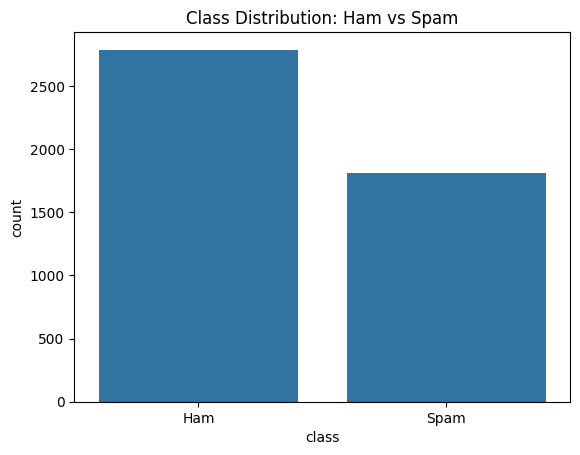

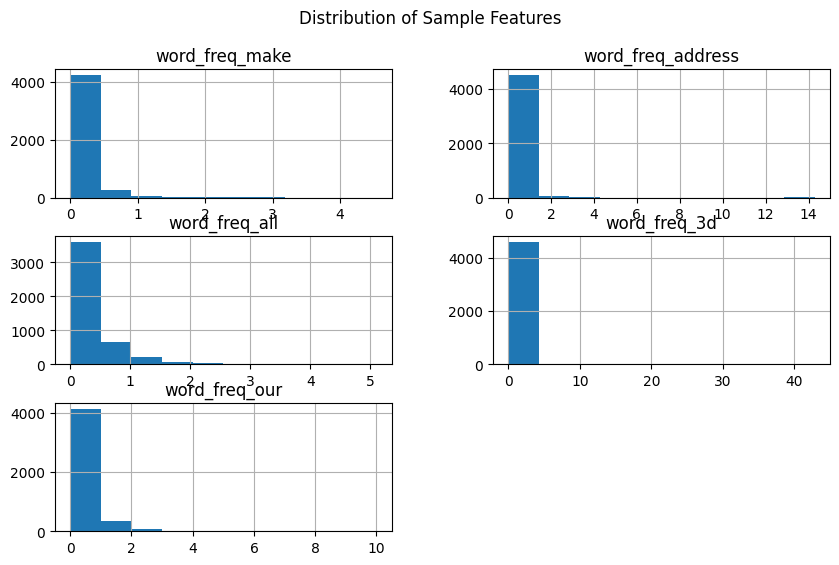

In [ ]:
#EDA

# Class balance
sns.countplot(x=y)
plt.title("Class Distribution: Ham vs Spam")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# Feature distribution of first 5 features
df.iloc[:, :5].hist(figsize=(10, 6))
plt.suptitle("Distribution of Sample Features")
plt.show()


In [ ]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Train Models
# A. Naïve Bayes Models
# Use StandardScaler for GaussianNB and BernoulliNB
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

# Use MinMaxScaler for MultinomialNB to keep values non-negative
X_train_mnb = MinMaxScaler().fit_transform(X_train)
X_test_mnb = MinMaxScaler().fit_transform(X_test)

# Rebuild models with appropriate inputs
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)
y_pred = gnb.predict(X_test_std)
print("\nGaussianNB Performance:")
print(classification_report(y_test, y_pred))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train_std, y_train)
y_pred = bnb.predict(X_test_std)
print("\nBernoulliNB Performance:")
print(classification_report(y_test, y_pred))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred = mnb.predict(X_test_mnb)
print("\nMultinomialNB Performance:")
print(classification_report(y_test, y_pred))



GaussianNB Performance:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       558
           1       0.72      0.93      0.81       363

    accuracy                           0.83       921
   macro avg       0.83      0.84      0.83       921
weighted avg       0.85      0.83      0.83       921


BernoulliNB Performance:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       558
           1       0.90      0.83      0.87       363

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921


MultinomialNB Performance:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       558
           1       0.88      0.88      0.88       363

    accuracy                           0.91       921
   macro avg       0.90      0.90      0.90      

In [ ]:
import time

# Basic KNN for k=3,5,7 (assuming X_train, y_train, X_test, y_test are defined)
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"\nKNN (k={k}) Performance:")
    print(classification_report(y_test, y_pred))

# KNN with KDTree
print("\nKNN (k=5, algorithm='kd_tree'):")
start_time = time.time()
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kd.fit(X_train_std, y_train)
y_pred_kd = knn_kd.predict(X_test_std)
kd_time = time.time() - start_time
print(classification_report(y_test, y_pred_kd))
print(f"KDTree KNN Time: {kd_time:.4f} seconds")

# KNN with BallTree
print("\nKNN (k=5, algorithm='ball_tree'):")
start_time = time.time()
knn_ball = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_ball.fit(X_train_std, y_train)
y_pred_ball = knn_ball.predict(X_test_std)
ball_time = time.time() - start_time
print(classification_report(y_test, y_pred_ball))
print(f"BallTree KNN Time: {ball_time:.4f} seconds")



KNN (k=3) Performance:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       558
           1       0.88      0.87      0.87       363

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921


KNN (k=5) Performance:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       558
           1       0.89      0.87      0.88       363

    accuracy                           0.91       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921


KNN (k=7) Performance:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       558
           1       0.89      0.87      0.88       363

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
we

In [ ]:
#C. Support Vector Machines
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"\nSVM ({kernel} kernel) Performance:")
    print(classification_report(y_test, y_pred))


SVM (linear kernel) Performance:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921


SVM (poly kernel) Performance:
              precision    recall  f1-score   support

           0       0.74      0.99      0.84       558
           1       0.96      0.46      0.62       363

    accuracy                           0.78       921
   macro avg       0.85      0.72      0.73       921
weighted avg       0.83      0.78      0.76       921


SVM (rbf kernel) Performance:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       558
           1       0.93      0.88      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.


GaussianNB Metrics:
Accuracy: 0.83, Precision: 0.71, Recall: 0.96, F1-score: 0.82
              precision    recall  f1-score   support

           0       0.97      0.75      0.84       558
           1       0.71      0.96      0.82       363

    accuracy                           0.83       921
   macro avg       0.84      0.85      0.83       921
weighted avg       0.87      0.83      0.83       921



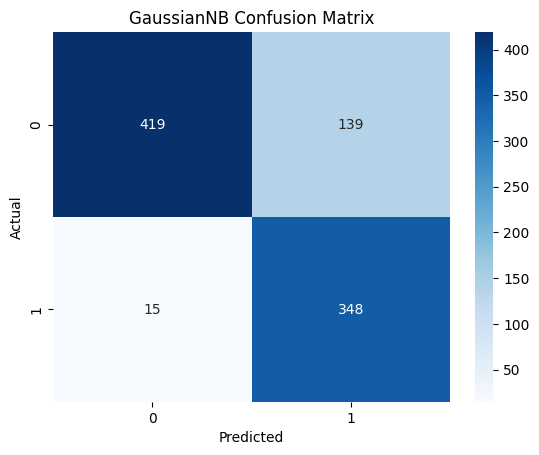

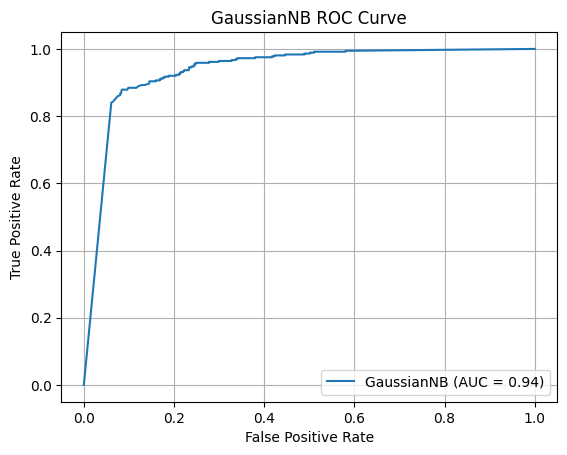


BernoulliNB Metrics:
Accuracy: 0.90, Precision: 0.90, Recall: 0.84, F1-score: 0.87
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       558
           1       0.90      0.84      0.87       363

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921



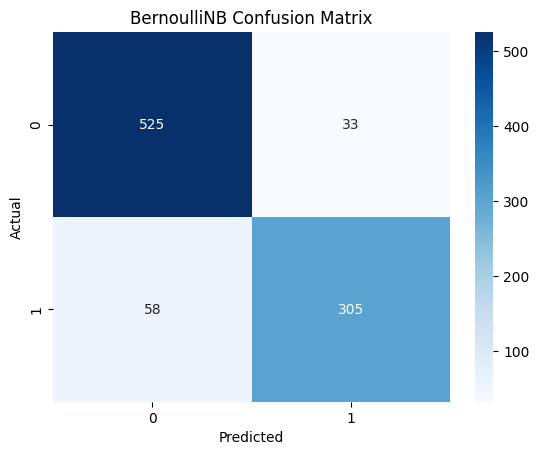

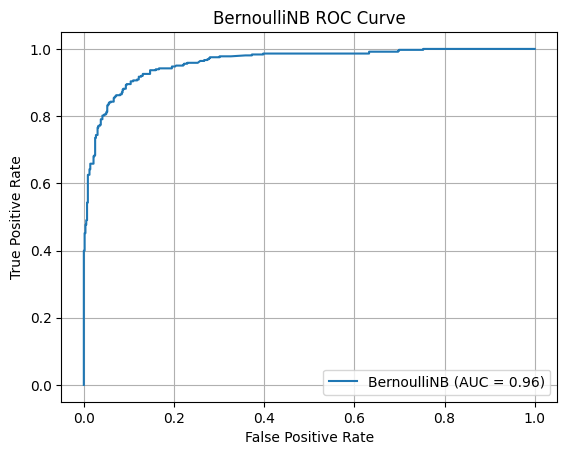


MultinomialNB Metrics:
Accuracy: 0.90, Precision: 0.93, Recall: 0.79, F1-score: 0.86
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       558
           1       0.93      0.79      0.86       363

    accuracy                           0.90       921
   macro avg       0.91      0.88      0.89       921
weighted avg       0.90      0.90      0.89       921



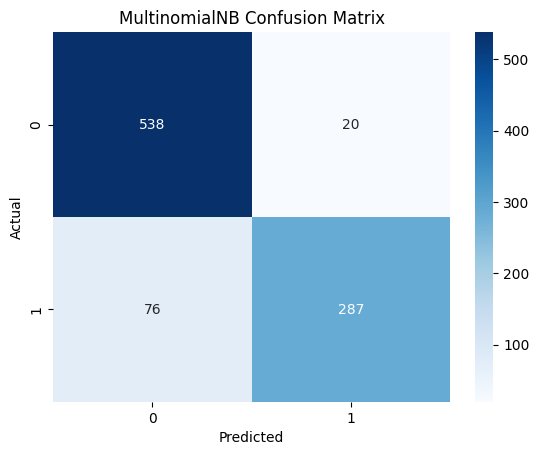

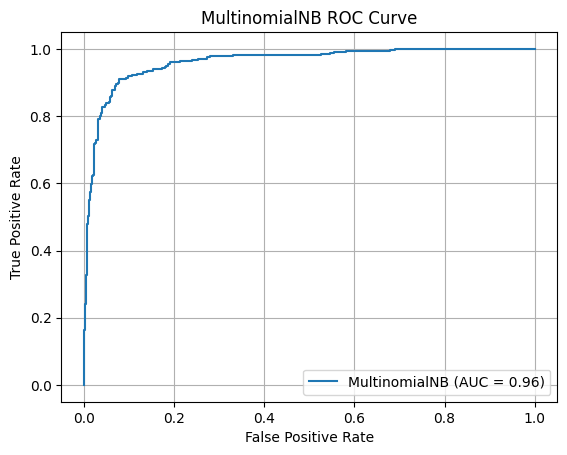


KNN k=5 Metrics:
Accuracy: 0.91, Precision: 0.89, Recall: 0.87, F1-score: 0.88
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       558
           1       0.89      0.87      0.88       363

    accuracy                           0.91       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



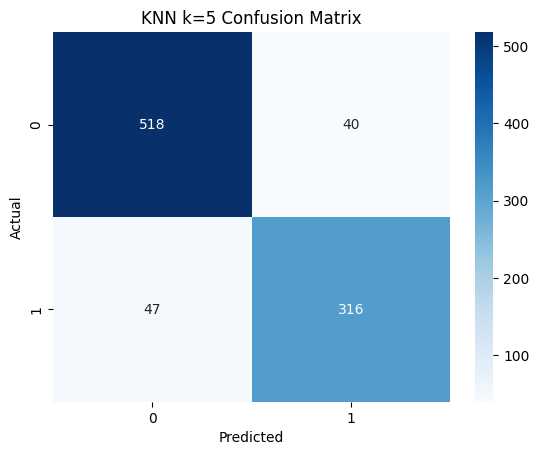

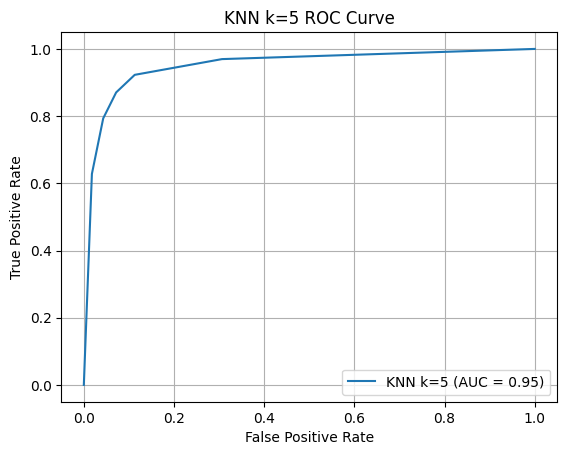


SVM RBF Metrics:
Accuracy: 0.93, Precision: 0.93, Recall: 0.88, F1-score: 0.91
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       558
           1       0.93      0.88      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



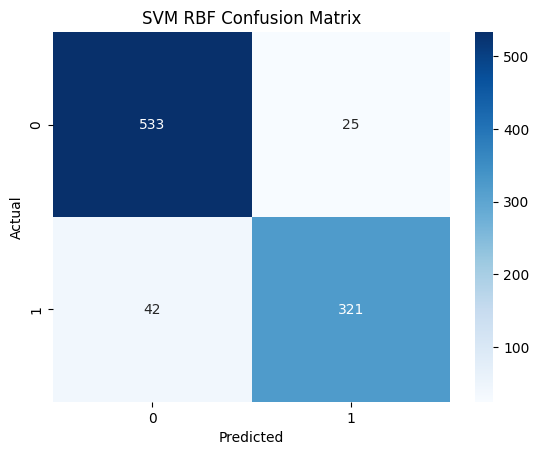

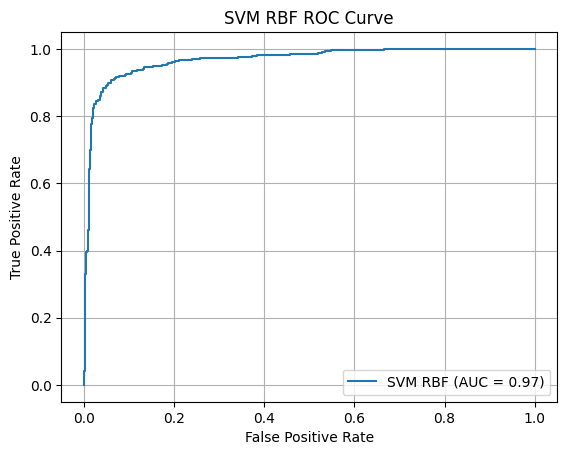

In [ ]:
def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} Metrics:\nAccuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{name} ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

# ===== Train and Evaluate Models =====

# Standard Scaler for GaussianNB & BernoulliNB
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# MinMaxScaler for MultinomialNB
scaler_mnb = MinMaxScaler()
X_train_mnb = scaler_mnb.fit_transform(X_train)
X_test_mnb = scaler_mnb.transform(X_test)

# GaussianNB
evaluate_model(GaussianNB().fit(X_train_std, y_train), "GaussianNB", X_test_std, y_test)

# BernoulliNB
evaluate_model(BernoulliNB().fit(X_train_std, y_train), "BernoulliNB", X_test_std, y_test)

# MultinomialNB
evaluate_model(MultinomialNB().fit(X_train_mnb, y_train), "MultinomialNB", X_test_mnb, y_test)

# KNN
evaluate_model(KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train), "KNN k=5", X_test, y_test)

# SVM RBF
evaluate_model(SVC(kernel='rbf', probability=True).fit(X_train, y_train), "SVM RBF", X_test, y_test)




In [ ]:
# --------------------------
# Extended K-Fold Cross Validation (Detailed Output + DataFrame)
# --------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

models_for_cv = {
    'GaussianNB': (GaussianNB(), X_scaled_std),
    'BernoulliNB': (BernoulliNB(), X_scaled_std),
    'MultinomialNB': (MultinomialNB(), X_scaled_mnb),
    'KNN (k=5)': (KNeighborsClassifier(n_neighbors=5), X_scaled_std),
    'KNN KDTree (k=5)': (KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'), X_scaled_std),
    'KNN BallTree (k=5)': (KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree'), X_scaled_std),
    'SVM (RBF)': (SVC(kernel='rbf', probability=True), X_scaled_std)
}

for name, (model, X_data) in models_for_cv.items():
    scores = cross_val_score(model, X_data, y, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} fold scores: {scores} | Mean: {scores.mean():.4f}")

# Convert to DataFrame for tabular display
cv_df = pd.DataFrame(cv_results)
print("\nK-Fold Cross Validation Results:")
print(cv_df)

# Print average accuracy per model
print("\nAverage CV Accuracy:")
print(cv_df.mean())


GaussianNB fold scores: [0.82193268 0.80326087 0.79456522 0.82282609 0.83369565] | Mean: 0.8153
BernoulliNB fold scores: [0.90010858 0.90652174 0.90217391 0.89782609 0.90326087] | Mean: 0.9020
MultinomialNB fold scores: [0.87187839 0.89347826 0.88913043 0.89130435 0.88586957] | Mean: 0.8863
KNN (k=5) fold scores: [0.89576547 0.90434783 0.92934783 0.90326087 0.90978261] | Mean: 0.9085
KNN KDTree (k=5) fold scores: [0.89576547 0.90434783 0.92934783 0.90326087 0.90978261] | Mean: 0.9085
KNN BallTree (k=5) fold scores: [0.89576547 0.90434783 0.92934783 0.90326087 0.90978261] | Mean: 0.9085
SVM (RBF) fold scores: [0.93485342 0.93369565 0.92282609 0.93586957 0.93043478] | Mean: 0.9315

K-Fold Cross Validation Results:
   GaussianNB  BernoulliNB  MultinomialNB  KNN (k=5)  KNN KDTree (k=5)  \
0    0.821933     0.900109       0.871878   0.895765          0.895765   
1    0.803261     0.906522       0.893478   0.904348          0.904348   
2    0.794565     0.902174       0.889130   0.929348    